In [1]:
import matplotlib.pyplot as plt 
import numpy as np

m = 100
x = [0.0, 10.0]
np.random.seed(0)
scatterx = 10*np.random.sample(m)
scattery = scatterx + np.random.normal(0,1,m)

plt.plot(x, x, c='b')
plt.scatter(scatterx, scattery ,c='black')
plt.axis([0,10,0,10])
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
#initial power

def objective_function(y, hx, m):
    loss =  hx - y
    tmp = np.sum(loss)
    sqr = tmp*tmp 
    return sqr/(2*m)

def loss_function_theta_zero(y, hx, m):
    loss = hx - y
    tmp = np.sum(loss)
    return tmp/m


    
def loss_function_theta_one(y,hx, x, m):
    loss = (hx - y)*x
    tmp = np.sum(loss)
    return tmp/m
    
    

hx = scatterx

origin = objective_function(scattery, hx, m)
print(origin)
#the origin objective functions loss is 1.8496249955788826

1.8496249955788826


0.14823455946423655 0.9431322988123467


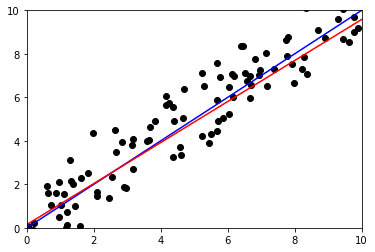

In [3]:
#gradient descending

threshold = 5

#initial condition
theta0 = 0
theta1 = 0
hx = scatterx*theta1 + theta0
#step_size 
step = 0.001
loss_list = []
loss_count = []
theta0_list = []
theta1_list = []
enough = False
count = 0 
while(enough == False):
    loss = objective_function(scattery, hx, m)
    loss_list.append(loss)
    loss_count.append(count)
    theta0_list.append(theta0)
    theta1_list.append(theta1)
    if(loss < threshold ):
        enough = True
    else:
        count = count + 1
        theta0 = theta0 - step*loss_function_theta_zero(scattery, hx, m)
        theta1 = theta1 - step*loss_function_theta_one(scattery, hx, scatterx, m)
        hx = scatterx*theta1 + theta0
        
print(theta0, theta1)

plt.plot(x, x, c='b')
plt.scatter(scatterx, scattery ,c='black')
plt.plot([0,10],[theta0, theta1*10+theta0], c='r')
plt.axis([0,10,0,10])
plt.show()

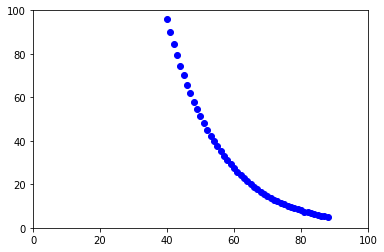

In [4]:
#plotting energy value
plt.scatter(loss_count, loss_list, c='blue')
plt.axis([0,100,0,100])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


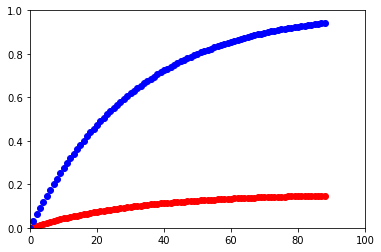

In [20]:
#plotting model parameters

plt.scatter(loss_count, theta0_list, c='red')
plt.scatter(loss_count, theta1_list, c = (0, 0, 1))
plt.axis([0,100,0,1])
plt.show()